### Plotting selected spectrum

In [1]:
import os
import sys
import glob
import numpy as np
import scipy.optimize    as op
import matplotlib.pyplot as plt
import urllib.request
from astropy.io import fits
from astropy.table import Table
from scipy.interpolate import make_interp_spline

In [2]:
file_spc="spec-7339-56799-0379.fits" #COMPAR
#file_spc="spec-4961-55719-0526.fits" #metals
#file_spc="spec-5206-56033-0202(highSNR2).fits" #COMPAR
keys = [int(file_spc[5:9]),int(file_spc[10:15]),int(file_spc[16:20])]
local_dirspc="/home/holman/FILES/catalogs/"
spc = os.path.join(local_dirspc,file_spc)

In [3]:
def ident():
    nuevo = fits.open(spc)[2]
    comp = Table.read(nuevo)
    ti = comp['Z']
    #nuevo.close()
    return ti
def sdss_name():
    nuevo = fits.open(os.path.join(local_dirspc,"DR14Q_v4_4.fits"))
    comp = Table.read(nuevo)
    a = (comp['PLATE']==keys[0]) & (comp['MJD']==keys[1]) & (comp['FIBERID']==keys[2])
    spec = comp[a]
    name = spec['SDSS_NAME']
    return name
def sdss_z():
    nuevo = fits.open(os.path.join(local_dirspc,"DR14Q_v4_4.fits"))
    comp = Table.read(nuevo)
    a = (comp['PLATE']==keys[0]) & (comp['MJD']==keys[1]) & (comp['FIBERID']==keys[2])
    spec = comp[a]
    z = spec['Z']
    return z

In [4]:
# Define the Lyman-alpha and Lyman-beta rest wavelengths in Angtroms.
lines = {
  "Lyb": 1025.72,
  "Lya": 1215.67,
  "CIV": 1549.06,
  "CIII": 1908.734,
  "MgII": 2798.75,
  "OIII": 5006.843,
  "Ha": 6562.819,
  "OVI": 1035,
  "NV": 1240.14,
  "CII": 2326.44,
  "HeII": 1640.42,
  "SiIV": 1396.76,
  "Ly-L": 912,
  "OI":1302.168
}
txt_prop = {'style' : 'oblique', 'family' : 'serif', 'size' :20}

/tmp/ipykernel_22369/1061746117.py:14: RuntimeWarning: divide by zero encountered in divide
  plt.plot(10**spectra['loglam'],1/np.sqrt(spectra['ivar']),lw=2, color = '#4C934C',label = 'Noise')


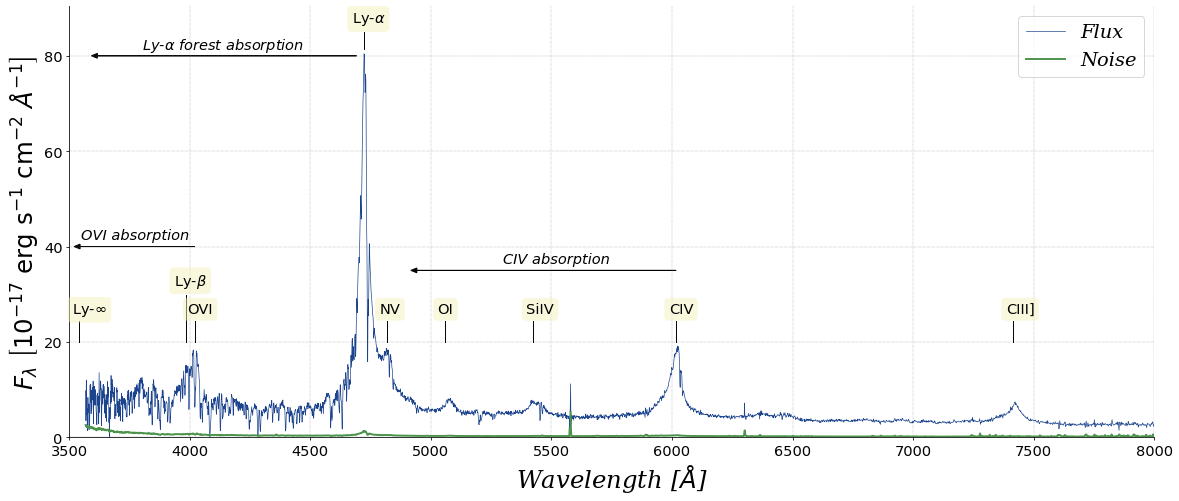

In [6]:
spectra = Table.read(spc)
info_add = fits.open(spc)[2]
add = Table.read(info_add)
tipe = str(add['OBJTYPE'][0])

plt.rcParams['axes.spines.left'] = True
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.bottom'] = True


plt.figure(figsize=(20,8),dpi=70)
plt.plot(10**spectra['loglam'],spectra['flux'],label = 'Flux',lw=0.7, color ='#1C448E')
plt.plot(10**spectra['loglam'],1/np.sqrt(spectra['ivar']),lw=2, color = '#4C934C',label = 'Noise')
plt.ylabel(r"$F_{\lambda}\ \left[ 10^{-17}\ {\rm erg\ s}^{-1}\ {\rm cm}^{-2}\ \AA^{-1} \right]$", style = 'oblique', family = 'serif', size = 25)
plt.xlabel('Wavelength [$\AA$]', style = 'oblique', family = 'serif', size = 25)
plt.yticks(fontsize = 15)
plt.xticks(fontsize = 15)
plt.xlim(3500,8000)
plt.ylim(0,max(spectra['flux'])+10)
plt.grid(True, which="both", ls=":", color = 'gray', linewidth = 0.5)

lw_fl = 1
lc_fl = 'black'
a_fl = 1
lb_lines = [0.22,0.27]
plt.axvline((1+ ident()) * lines["Lya"],ymin =0.9,ymax= 0.94, c=lc_fl, alpha=a_fl, linewidth = lw_fl)
plt.axvline((1+ ident()) * lines["Lyb"],ymin =lb_lines[0],ymax= 0.33, c=lc_fl, alpha=a_fl, linewidth = lw_fl)
plt.axvline((1+ ident()) * lines["CIV"],ymin =lb_lines[0],ymax= lb_lines[1], c=lc_fl, alpha=a_fl,ls ="-", linewidth = lw_fl)
plt.axvline((1+ ident()) * lines["CIII"],ymin =lb_lines[0],ymax= lb_lines[1], c=lc_fl, alpha=a_fl,ls ="-", linewidth = lw_fl)
plt.axvline((1+ ident()) * lines["MgII"],ymin =lb_lines[0],ymax= lb_lines[1], c=lc_fl, alpha=a_fl,ls ="-", linewidth = lw_fl)
plt.axvline((1+ ident()) * lines["OIII"],ymin =lb_lines[0],ymax= lb_lines[1], c=lc_fl, alpha=a_fl,ls ="-", linewidth = lw_fl)
plt.axvline((1+ ident()) * lines["Ha"],ymin =lb_lines[0],ymax= lb_lines[1], c=lc_fl, alpha=a_fl,ls ="-", linewidth = lw_fl)
plt.axvline((1+ ident()) * lines["OVI"],ymin =lb_lines[0],ymax= lb_lines[1], c=lc_fl, alpha=a_fl,ls ="-", linewidth = lw_fl)
plt.axvline((1+ ident()) * lines["NV"],ymin =lb_lines[0],ymax= lb_lines[1], c=lc_fl, alpha=a_fl,ls ="-", linewidth = lw_fl)
plt.axvline((1+ ident()) * lines["CII"],ymin =lb_lines[0],ymax= lb_lines[1], c=lc_fl, alpha=a_fl,ls ="-", linewidth = lw_fl)
plt.axvline((1+ ident()) * lines["SiIV"],ymin =lb_lines[0],ymax= lb_lines[1], c=lc_fl, alpha=a_fl,ls ="-", linewidth = lw_fl)
plt.axvline((1+ ident()) * lines["Ly-L"],ymin =lb_lines[0],ymax= lb_lines[1], c=lc_fl, alpha=a_fl,ls ="-", linewidth = lw_fl)
plt.axvline((1+ ident()) * lines["OI"],ymin =lb_lines[0],ymax= lb_lines[1], c=lc_fl, alpha=a_fl,ls ="-", linewidth = lw_fl)

text_rot = 0
text_ypos = 26
text_xdel = 30
text_fc = '#F4F1BB'

plt.text((1+ ident()) * lines["Lya"]-50, 87, r'Ly-$\alpha$', fontsize = 15,bbox = {'facecolor': text_fc, 'alpha': 0.5, 'boxstyle': "round,pad=0.3", 'ec': 'none'}, rotation = text_rot)
plt.text((1+ ident()) * lines["Lyb"]-50, 32, r'Ly-$\beta$', fontsize = 15, bbox = {'facecolor': text_fc, 'alpha': 0.5, 'boxstyle': "round,pad=0.3", 'ec': 'none'}, rotation = text_rot)
plt.text((1+ ident()) * lines["Ly-L"]-text_xdel, text_ypos, r'Ly-$\infty$', fontsize = 15, bbox = {'facecolor': text_fc, 'alpha': 0.5, 'boxstyle': "round,pad=0.3", 'ec': 'none'}, rotation = text_rot)
plt.text((1+ ident()) * lines["CIV"]-text_xdel, text_ypos, 'CIV', fontsize = 15, bbox = {'facecolor': text_fc, 'alpha': 0.5, 'boxstyle': "round,pad=0.3", 'ec': 'none'}, rotation = text_rot)
plt.text((1+ ident()) * lines["CIII"]-text_xdel, text_ypos, 'CIII]', fontsize = 15, bbox = {'facecolor': text_fc, 'alpha': 0.5, 'boxstyle': "round,pad=0.3", 'ec': 'none'}, rotation = text_rot)
plt.text((1+ ident()) * lines["OVI"]-text_xdel, text_ypos, 'OVI', fontsize = 15, bbox = {'facecolor': text_fc, 'alpha': 0.5, 'boxstyle': "round,pad=0.3", 'ec': 'none'}, rotation = text_rot)
plt.text((1+ ident()) * lines["NV"]-text_xdel, text_ypos, 'NV', fontsize = 15, bbox = {'facecolor': text_fc, 'alpha': 0.5, 'boxstyle': "round,pad=0.3", 'ec': 'none'}, rotation = text_rot)
plt.text((1+ ident()) * lines["SiIV"]-text_xdel, text_ypos, 'SiIV', fontsize = 15, bbox = {'facecolor': text_fc, 'alpha': 0.5, 'boxstyle': "round,pad=0.3", 'ec': 'none'}, rotation = text_rot)
plt.text((1+ ident()) * lines["OI"]-text_xdel, text_ypos, 'OI', fontsize = 15,bbox = {'facecolor': text_fc, 'alpha': 0.5, 'boxstyle': "round,pad=0.3", 'ec': 'none'}, rotation = text_rot)


plt.arrow((1+ident()[0]) * lines["CIV"],35,-1100,0,length_includes_head = True,head_width = 1, head_length = 25, color = 'black')
plt.arrow((1+ident()[0]) * lines["Lya"]-text_xdel,80,-1100,0,length_includes_head = True, head_width = 1, head_length = 25, color = 'black')
plt.arrow((1+ident()[0]) * lines["OVI"],40,-500,0,length_includes_head = True,head_width = 1, head_length = 25, color = 'black')

plt.text(5300, 36.5, 'CIV absorption', fontsize = 15, 
         bbox = {'facecolor': 'none', 'alpha': 0.3, 'boxstyle': "round,pad=0.3", 'ec': 'none'},
         rotation = text_rot, style = 'oblique')
plt.text(3800, 81.5, r'Ly-$\alpha$ forest absorption', fontsize = 15, 
         bbox = {'facecolor': 'none', 'alpha': 0.3, 'boxstyle': "round,pad=0.3", 'ec': 'none'},
         rotation = text_rot, style = 'oblique')
plt.text(3550, 41.5, 'OVI absorption', fontsize = 15, 
         bbox = {'facecolor': 'none', 'alpha': 0.3, 'boxstyle': "round,pad=0.3", 'ec': 'none'},
         rotation = text_rot, style = 'oblique')


plt.legend(prop = txt_prop, loc= 'upper right')
plt.show()


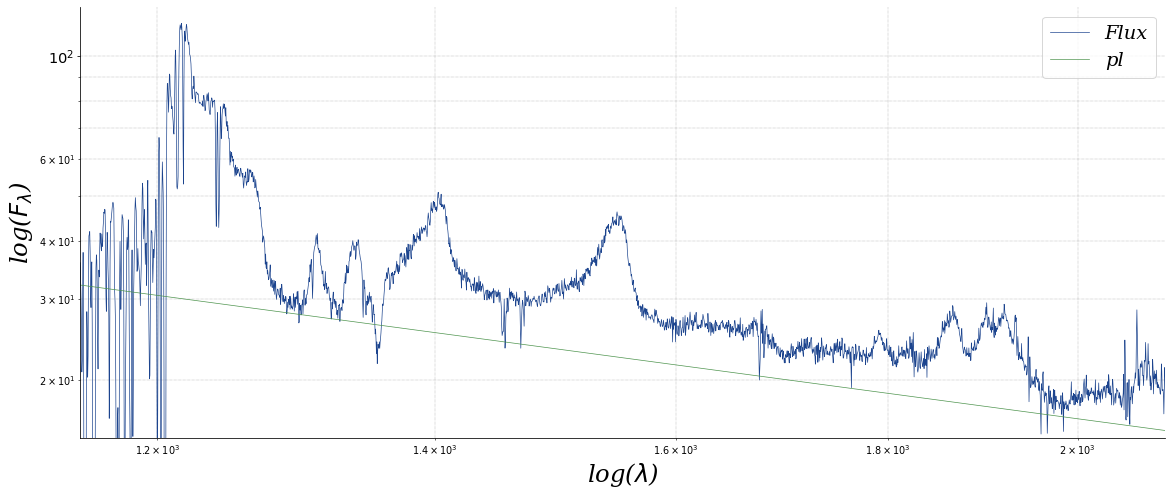

In [111]:
#file_spc="spec-7339-56799-0379.fits" #COMPAR
file_spc="spec-5206-56033-0202(highSNR2).fits" #COMPAR
keys = [int(file_spc[5:9]),int(file_spc[10:15]),int(file_spc[16:20])]
local_dirspc="/home/holman/FILES/catalogs/"
spc = os.path.join(local_dirspc,file_spc)


spectra = Table.read(spc)
info_add = fits.open(spc)[2]
add = Table.read(info_add)
tipe = str(add['OBJTYPE'][0])

plt.rcParams['axes.spines.left'] = True
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.bottom'] = True


plt.figure(figsize=(20,8),dpi=70)
plt.plot((10**spectra['loglam'])/((1+ ident())),spectra['flux'],label = 'Flux',lw=0.7, color ='#1C448E')
#plt.plot(10**spectra['loglam'],1/np.sqrt(spectra['ivar']),lw=2, color = '#4C934C',label = 'Noise')
plt.ylabel(r"log($F_{\lambda}$)", style = 'oblique', family = 'serif', size = 25)
plt.xlabel('log($\lambda$)', style = 'oblique', family = 'serif', size = 25)
plt.yticks(fontsize = 15)
plt.xticks(fontsize = 15)
plt.yscale('log')
plt.xscale('log')
plt.xlim(1150,2100)
plt.ylim(15,max(spectra['flux'])+10)
plt.grid(True, which="both", ls=":", color = 'gray', linewidth = 0.5)


p_l = np.linspace(1150,2100,500)  #power_law data
plt.plot(p_l,151000*(p_l**-1.2),label = 'pl',lw=0.7, color ='#4C934C')




plt.legend(prop = txt_prop, loc= 'upper right')
plt.show()

In [114]:
d_t = {
  "Lyb": [1025.72,'b'],
  "Lya": [1215.6,'sd']
}

In [120]:
d_t["Lya"][1]

'sd'

In [122]:
a = [1,3,4]

for x in range(len(a)):
    if ((a[x]/2)==2):
        raise ValueError("shit")
    else:
        print("all good")


all good
all good


ValueError: shit

/tmp/ipykernel_14853/2420988164.py:14: RuntimeWarning: divide by zero encountered in divide
  plt.plot(10**spectra['loglam'],1/np.sqrt(spectra['ivar']),lw=2, color = '#4C934C',label = 'Noise')


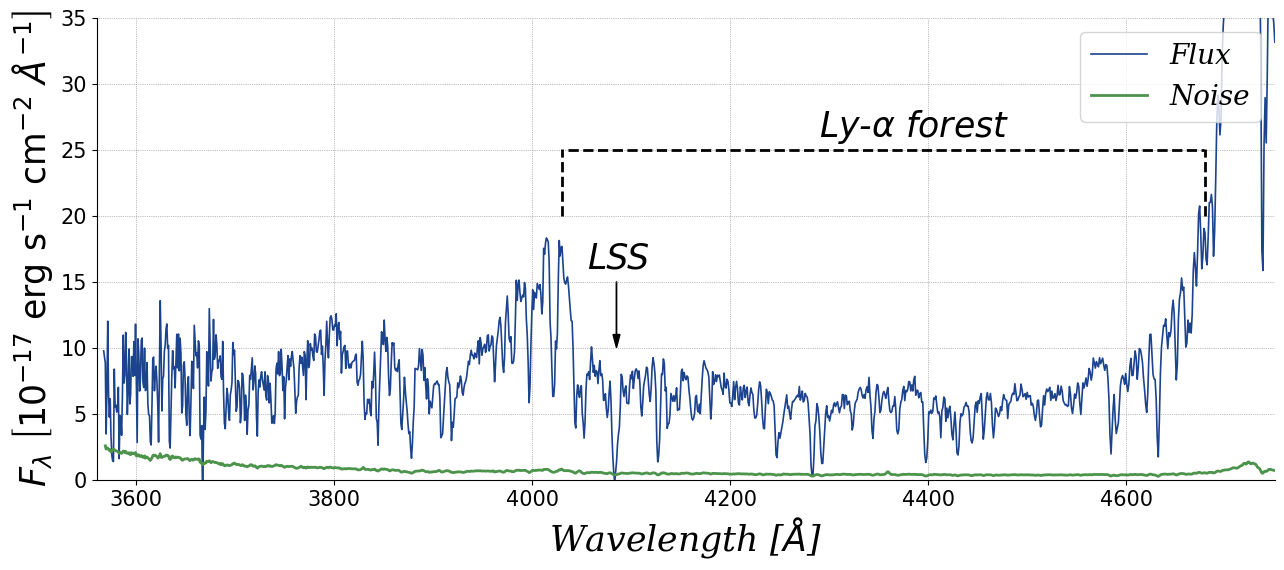

In [45]:
spectra = Table.read(spc)
info_add = fits.open(spc)[2]
add = Table.read(info_add)
tipe = str(add['OBJTYPE'][0])

plt.rcParams['axes.spines.left'] = True
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.bottom'] = True


plt.figure(figsize=(15.2,6),dpi=100)
plt.plot(10**spectra['loglam'],spectra['flux'],label = 'Flux',lw=1.2, color ='#1C448E')
plt.plot(10**spectra['loglam'],1/np.sqrt(spectra['ivar']),lw=2, color = '#4C934C',label = 'Noise')
plt.ylabel(r"$F_{\lambda}\ \left[ 10^{-17}\ {\rm erg\ s}^{-1}\ {\rm cm}^{-2}\ \AA^{-1} \right]$", style = 'oblique', family = 'serif', size = 25)
plt.xlabel('Wavelength [$\AA$]', style = 'oblique', family = 'serif', size = 25)
plt.yticks(fontsize = 15)
plt.xticks(fontsize = 15)
plt.xlim(3560,4750)
plt.ylim(0,35)
plt.grid(True, which="both", ls=":", color = 'gray', linewidth = 0.5)

lw_fl = 2
lc_fl = 'black'
a_fl = 1
lb_lines = [0.22,0.27]



text_rot = 0
text_ypos = 26
text_xdel = 30
text_fc = '#F4F1BB'

plt.axvline(4030,ymin =0.57,ymax= 0.715, c=lc_fl, alpha=a_fl, linewidth = lw_fl,linestyle = '--')
plt.axvline(4680,ymin =0.57,ymax= 0.715, c=lc_fl, alpha=a_fl, linewidth = lw_fl,linestyle = '--')

plt.axhline(25,xmin =0.4,xmax= 0.94, c=lc_fl, alpha=a_fl, linewidth = lw_fl,linestyle = '--')

#plt.arrow(4680,25,-650,0,length_includes_head = False, color = 'black', linewidth = 2,linestyle = '--')

plt.text(4290, 26, r'Ly-$\alpha$ forest', fontsize = 25, 
         bbox = {'facecolor': 'none', 'alpha': 0.3, 'boxstyle': "round,pad=0.3", 'ec': 'none'},
         rotation = text_rot, style = 'oblique')

plt.arrow(4085,15,0,-5,length_includes_head = True,head_width = 7, head_length = 1, color = 'black')

plt.text(4055, 16, r'LSS', fontsize = 25, 
         bbox = {'facecolor': 'none', 'alpha': 0.3, 'boxstyle': "round,pad=0.3", 'ec': 'none'},
         rotation = text_rot, style = 'oblique')




plt.legend(prop = txt_prop, loc= 'upper right')
plt.savefig('Lya forest.png', bbox_inches='tight')
plt.show()


## Parts of the forest and continuum

In [38]:
delta_NAME = 'delta-33.fits.gz'
DELTA = fits.open(os.path.join(local_dirspc,delta_NAME))[55]
delta = Table.read(DELTA)

A = 0.0023
B = 3.64
C = -0.05
D = 4.36
E = 0.21

def tau(z):
    t = A*((1+z)**B)+C*np.exp((-(1+z-D)**2)/(2*(E**2)))
    return -1*t

In [39]:
mean_flux = np.exp(tau(ident()))
cont_estim = delta['CONT'][:]/mean_flux

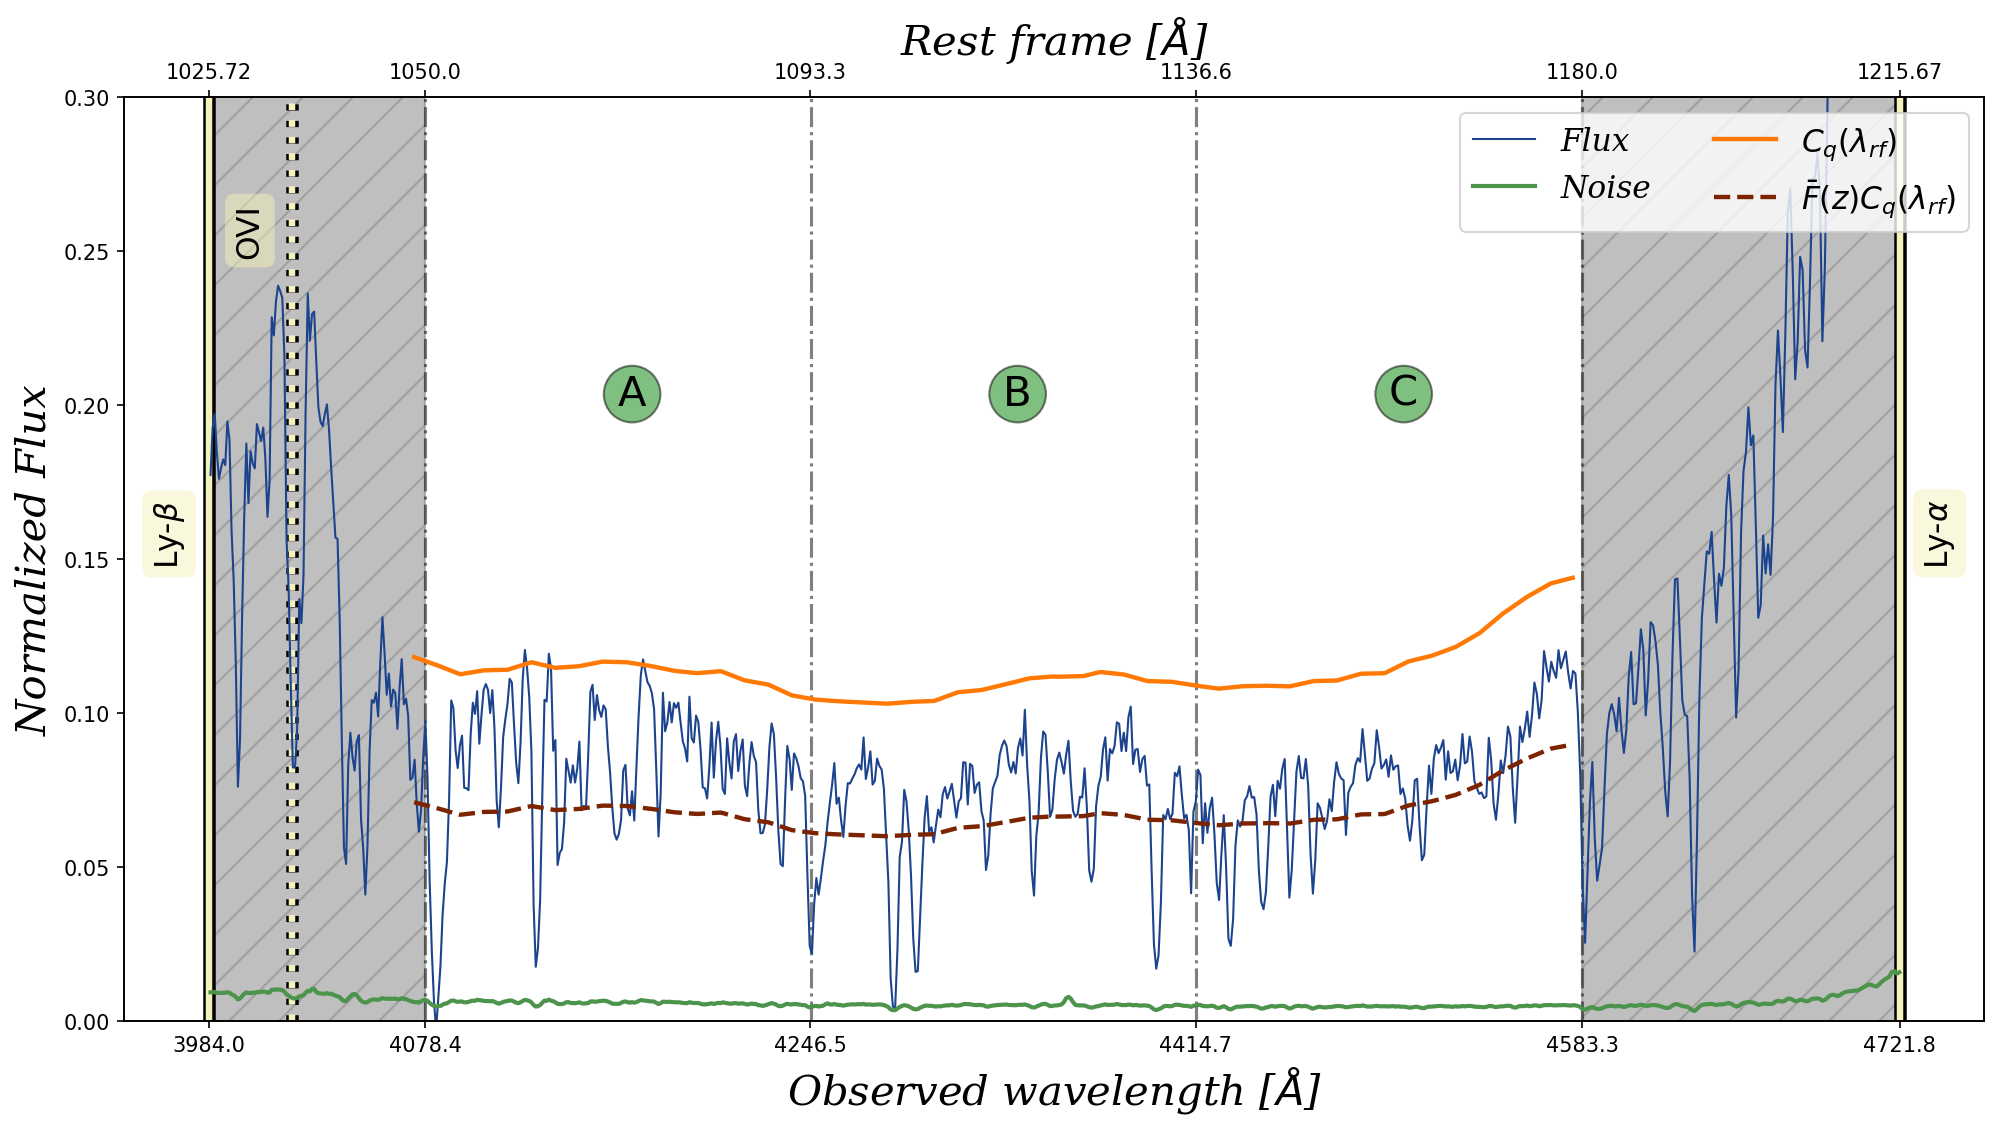

In [61]:
plt.rcParams['axes.spines.left'] = True
plt.rcParams['axes.spines.right'] = True
plt.rcParams['axes.spines.top'] = True
plt.rcParams['axes.spines.bottom'] = True


import matplotlib.patheffects as mpe

pe1 = [mpe.Stroke(linewidth=6, foreground='black'),
       mpe.Stroke(foreground='white',alpha=1),
       mpe.Normal()]

#figsize=(15.2,7.2)

fig, ax_main = plt.subplots(figsize=(16,8),dpi=150)

wave_cut=((10**spectra['loglam'])>(1. + ident()) * lines["Lyb"]) & ((10**spectra['loglam'])<(1. + ident()) * lines["Lya"])
forest = spectra[wave_cut]

plt.axvline((1+ ident()) * lines["Lya"], c='#F4F1BB', alpha=1, lw=3, path_effects=pe1)
plt.axvline((1+ ident()) * lines["Lyb"], c='#F4F1BB', alpha=1, lw =3, path_effects=pe1)
plt.axvline((1+ ident()) * 1050, c='black', alpha=0.5,ls ="-.", linewidth = 1.5)
plt.axvline((1+ ident()) * 1093.3, c='black', alpha=0.5,ls ="-.", linewidth = 1.5)
plt.axvline((1+ ident()) * 1136.6, c='black', alpha=0.5,ls ="-.", linewidth = 1.5)
plt.axvline((1+ ident()) * 1180, c='black', alpha=0.5,ls ="-.", linewidth = 1.5)
plt.axvline((1+ ident()) * lines["OVI"], c='#F4F1BB', alpha=1,ls =":", linewidth = 3, path_effects=pe1)

RUIDO = np.array(1/np.sqrt(forest['ivar']))

plt.plot(10**forest['loglam'],forest['flux']/max(forest['flux']),lw=1, color ='#1C448E',label = 'Flux')
plt.plot(10**forest['loglam'],RUIDO/max(forest['flux']),lw=2, color = '#4C934C',label = 'Noise')


plt.plot(delta['LAMBDA'][:],cont_estim/max(forest['flux']),lw=2.1, color = '#ff7904',label = r'${C}_{q}({\lambda}_{rf})$')
plt.plot(delta['LAMBDA'][:],delta['CONT'][:]/max(forest['flux'])-0.015,lw=2.1, color = '#7c2300',
         label = r'$\bar{F}(z){C}_{q}({\lambda}_{rf})$',linestyle='dashed')

#ax_main.fill_between([4078.3547,4246.5386],0.3,alpha = 0.1, color = '#F4F1BB')
#ax_main.fill_between([4246.5386,4414.7217],0.3, alpha = 0.1, color ='#F4F1BB')
#ax_main.fill_between([4414.7217,4583.294],0.3, alpha = 0.1, color ='#F4F1BB')


ax_main.fill_between([3984.0,4078.4],0.5,alpha = 0.5, color = 'gray',hatch = '/')
ax_main.fill_between([4583.3,4721.8],0.5,alpha = 0.5, color = 'gray',hatch = '/')





plt.ylim(0,0.3)
plt.ylabel('Normalized Flux', style = 'oblique', family = 'serif', size = 20) #'Flux 1E-17 erg/cm^2/s/Ang'
plt.xlabel('Observed wavelength [$\AA$]', style = 'oblique', family = 'serif', size = 20)

xtics = np.array([(1+ ident()) * lines["Lyb"],(1+ ident()) * 1050,(1+ ident()) * 1093.3,
             (1+ ident()) * 1136.6,(1+ ident()) * 1180,(1+ ident()) * lines["Lya"]])
#plt.xticks(xtics)

ax_main.set_xlabel('Observed wavelength [$\AA$]', style = 'oblique', family = 'serif', size = 20)
ax_main.set_ylabel('Normalized Flux', style = 'oblique', family = 'serif', size = 20)
ax_main.set_ylim(0,0.3)
ax_main.set_xticks([3984.0476,4078.3547,4246.5386,4414.7217,4583.294,4721.842 ])
labels1 = [item.get_text() for item in ax_main.get_xticklabels()]
ax_main.set_xticklabels([str(round(float(label), 1)) for label in labels1])


plt.text((1+ ident()) * 1071.65, 0.20, 'A', fontsize = 20, 
         bbox = dict(facecolor = 'green', alpha = 0.5,boxstyle=f"circle,pad={0.2}"))
plt.text((1+ ident()) * 1114.95, 0.20, 'B', fontsize = 20, 
         bbox = dict(facecolor = 'green', alpha = 0.5,boxstyle=f"circle,pad={0.2}"))
plt.text((1+ ident()) * 1158.3, 0.20, 'C', fontsize = 20,
         bbox = dict(facecolor = 'green', alpha = 0.5,boxstyle=f"circle,pad={0.2}"))

 #bbox = dict(boxstyle=f"circle,pad={point[3]}", fc="lightgrey")


'''plt.text((1+ ident()) * 1056.32, 0.747, '1050 to 1093.3 $\AA$ at rest', fontsize = 10, 
         bbox = {'facecolor': 'white', 'alpha': 0.5, 'boxstyle': "round,pad=0.3", 'ec': 'none'})
plt.text((1+ ident()) * 1099.62, 0.747, '1093.3 to 1136.6 $\AA$ at rest', fontsize = 10, 
         bbox = {'facecolor': 'white', 'alpha': 0.5, 'boxstyle': "round,pad=0.3", 'ec': 'none'})
plt.text((1+ ident()) * 1142.92, 0.747, '1136.6 to 1180 $\AA$ at rest', fontsize = 10, 
         bbox = {'facecolor': 'white', 'alpha': 0.5, 'boxstyle': "round,pad=0.3", 'ec': 'none'})
'''


plt.text((1+ ident()) * lines["Lya"]+10, 0.15, r'Ly-$\alpha$', fontsize = 15, 
         bbox = {'facecolor': text_fc, 'alpha': 0.5, 'boxstyle': "round,pad=0.3", 'ec': 'none'}, rotation = 90)
plt.text((1+ ident()) * lines["Lyb"]-25, 0.15, r'Ly-$\beta$', fontsize = 15, 
         bbox = {'facecolor': text_fc, 'alpha': 0.5, 'boxstyle': "round,pad=0.3", 'ec': 'none'}, rotation = 90)
plt.text((1+ ident()) * lines["OVI"]-25, 0.25, 'OVI', fontsize = 15, 
         bbox = {'facecolor': text_fc, 'alpha': 0.5, 'boxstyle': "round,pad=0.3", 'ec': 'none'}, rotation = 90)

txt_prop = {'style' : 'oblique', 'family' : 'serif', 'size' :15}
plt.legend(prop = txt_prop, loc= 'upper right', ncol = 2)


ax2 = ax_main.twiny()
ax1Ticks = ax_main.get_xticks()   
ax2Ticks = ax1Ticks

def tick_function(X):
    V = X/(1+add['Z']) + 0.01
    return ["%.3f" % z for z in V]

ax2.set_xticks(ax2Ticks)
ax2.set_xbound(ax_main.get_xbound())
ax2.set_xticklabels(tick_function(ax2Ticks))
ax2.set_xlabel(r'Rest frame [$\AA$]', style = 'oblique', family = 'serif', size = 20)
labels2 = [item.get_text() for item in ax2.get_xticklabels()]
ax2.set_xticklabels([str(round(float(label), 2)) for label in labels2])

plt.savefig('Forest division.png', bbox_inches='tight')
plt.show()



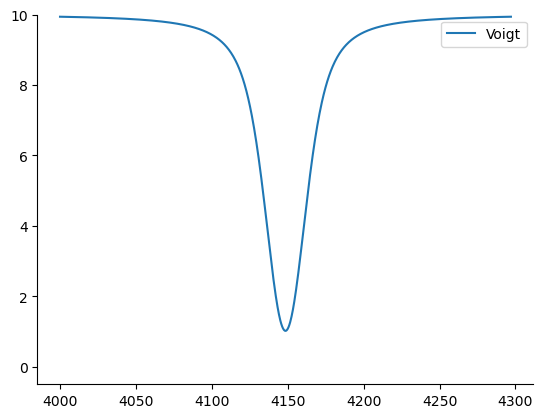

In [10]:
import numpy as np
from scipy.special import wofz
import pylab

def G(x, alpha):
    """ Return Gaussian line shape at x with HWHM alpha """
    return np.sqrt(np.log(2) / np.pi) / alpha\
                             * np.exp(-(x / alpha)**2 * np.log(2))

def L(x, gamma):
    """ Return Lorentzian line shape at x with HWHM gamma """
    return gamma / np.pi / (x**2 + gamma**2)

def V(x, alpha, gamma):
    """
    Return the Voigt line shape at x with Lorentzian component HWHM gamma
    and Gaussian component HWHM alpha.

    """
    sigma = alpha / np.sqrt(2 * np.log(2))

    return np.real(wofz((x + 1j*gamma)/sigma/np.sqrt(2))) / sigma\
                                                           /np.sqrt(2*np.pi)

alpha, gamma = 0.1, 0.1
x = np.linspace(-148.5,148.5,1000)
#pylab.plot(x, G(x, alpha), ls=':', label='Gaussian')
#pylab.plot(x, L(x, gamma), ls='--', label='Lorentzian')
pylab.plot(x+4148.50, 10+(-40*V(x*0.1, 1, 1)), label='Voigt')
#pylab.xlim(-0.8,0.8)
pylab.ylim(-0.5,10)
pylab.legend()
pylab.show()


## DLA y BAL examples

/tmp/ipykernel_30049/1634351487.py:19: RuntimeWarning: divide by zero encountered in divide
  plt.plot(10**spectra['loglam'],1/np.sqrt(spectra['ivar']),lw=2, color = '#4C934C',label = 'Noise')


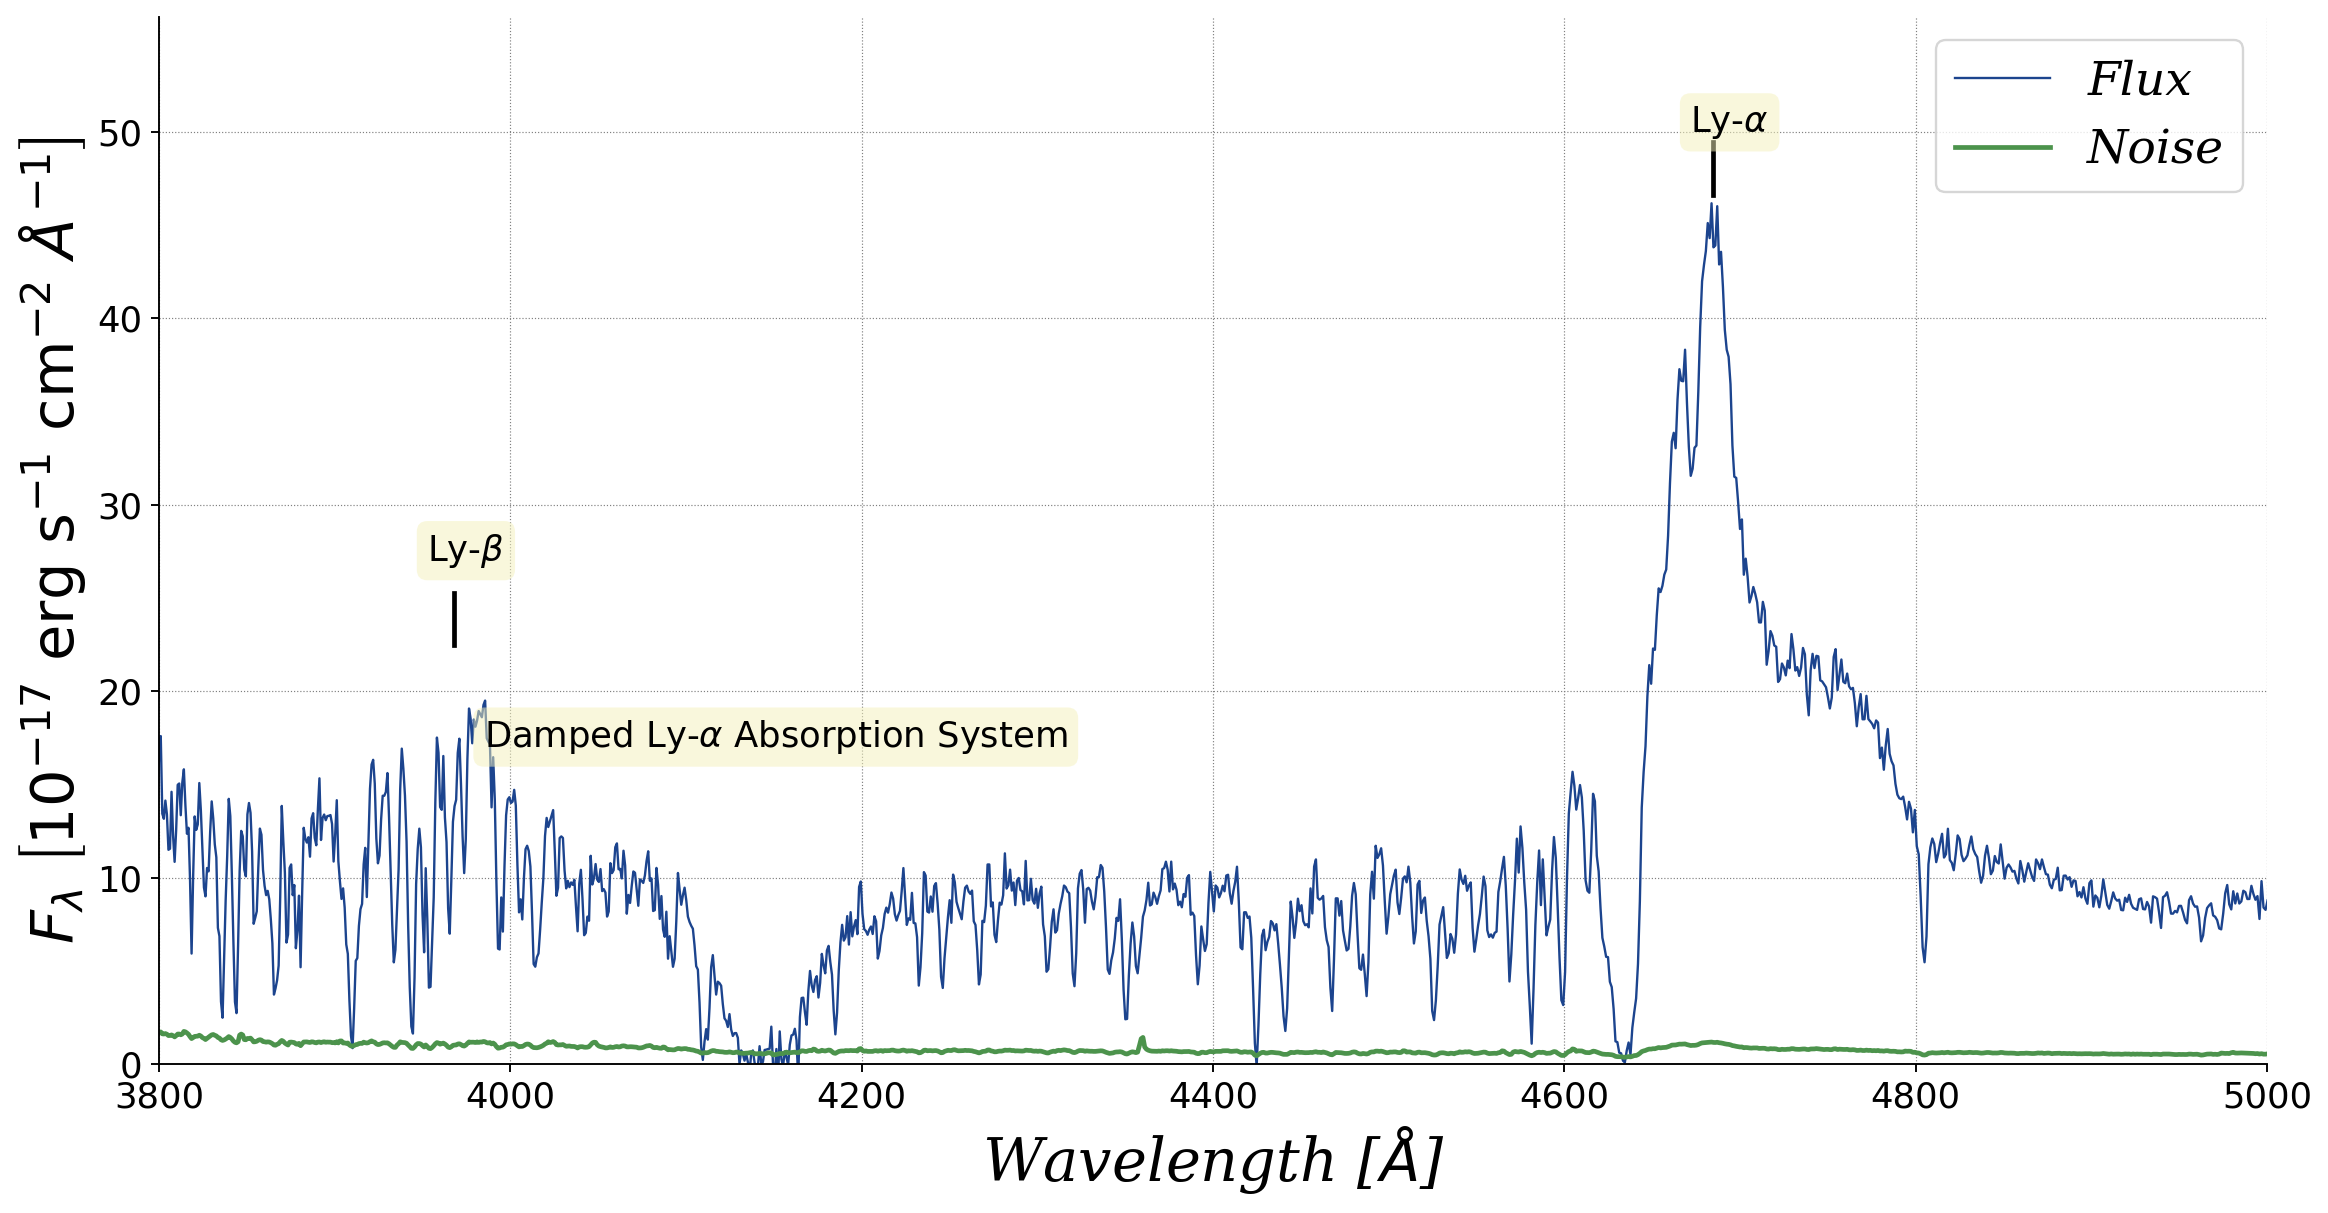

In [36]:
file_spc="spec-4987-55746-0672.fits"

keys = [int(file_spc[5:9]),int(file_spc[10:15]),int(file_spc[16:20])]

spc = os.path.join(local_dirspc,file_spc)

spectra = Table.read(spc)
info_add = fits.open(spc)[2]
add = Table.read(info_add)
tipe = str(add['OBJTYPE'][0])

plt.rcParams['axes.spines.left'] = True
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.bottom'] = True

plt.figure(figsize=(16,8),dpi=170)
plt.plot(10**spectra['loglam'],spectra['flux'],label = 'Flux',lw=1.0, color ='#1C448E')
plt.plot(10**spectra['loglam'],1/np.sqrt(spectra['ivar']),lw=2, color = '#4C934C',label = 'Noise')
plt.ylabel(r"$F_{\lambda}\ \left[ 10^{-17}\ {\rm erg\ s}^{-1}\ {\rm cm}^{-2}\ \AA^{-1} \right]$", style = 'oblique', family = 'serif', size = 25)
plt.xlabel('Wavelength [$\AA$]', style = 'oblique', family = 'serif', size = 25)
plt.yticks(fontsize = 15)
plt.xticks(fontsize = 15)

plt.xlim(3800,5000)
#plt.xlim(4148,4150)
#plt.ylim(0,2)
plt.ylim(0,max(spectra['flux'])+10)
plt.grid(True, which="both", ls=":", color = 'gray', linewidth = 0.5)

plt.text((1+ ident()) * lines["Lya"]-13, 50, r'Ly-$\alpha$', fontsize = 15, 
         bbox = {'facecolor': text_fc, 'alpha': 0.5, 'boxstyle': "round,pad=0.3", 'ec': 'none'}, rotation = text_rot)

plt.text((1+ ident()) * lines["Lyb"], 27, r'Ly-$\beta$', fontsize = 15, 
         bbox = {'facecolor': text_fc, 'alpha': 0.5, 'boxstyle': "round,pad=0.3", 'ec': 'none'}, rotation = text_rot)

plt.axvline((1+ ident()) * lines["Lya"],ymin =0.83,ymax= 0.88, c=lc_fl, alpha=a_fl, linewidth = lw_fl)
plt.axvline((1+ ident()) * lines["Lyb"]+15,ymin =0.40,ymax= 0.45, c=lc_fl, alpha=a_fl, linewidth = lw_fl)

#plt.axhline(y = 7, xmin = 0.16375+0.05, xmax = 0.41125-0.05, 
            #color = '#F08700', label='Masking',linewidth = 3, ls ='--')

plt.text(4145-160, 17, r'Damped Ly-$\alpha$ Absorption System', fontsize = 15, 
         bbox = {'facecolor': text_fc, 'alpha': 0.5, 'boxstyle': "round,pad=0.3", 'ec': 'none'}, rotation = text_rot)



#alpha, gamma = 0.1, 0.1
#x = np.linspace(-148.5,148.5,1000)
#pylab.plot(x+4145, 10+(-80*V(x*0.1, 1, 2)), label='Voigt profile',linewidth = 3, alpha = 0.8, color = '#19381F')
#pylab.xlim(-0.8,0.8)

plt.legend(prop = txt_prop, loc= 'upper right')
plt.savefig('eBOSS DLA.png', bbox_inches='tight')
plt.show()


/tmp/ipykernel_30049/4053596755.py:10: RuntimeWarning: divide by zero encountered in divide
  plt.plot(10**spectra['loglam'],1/np.sqrt(spectra['ivar']),lw=2, color = '#4C934C',label = 'Noise')


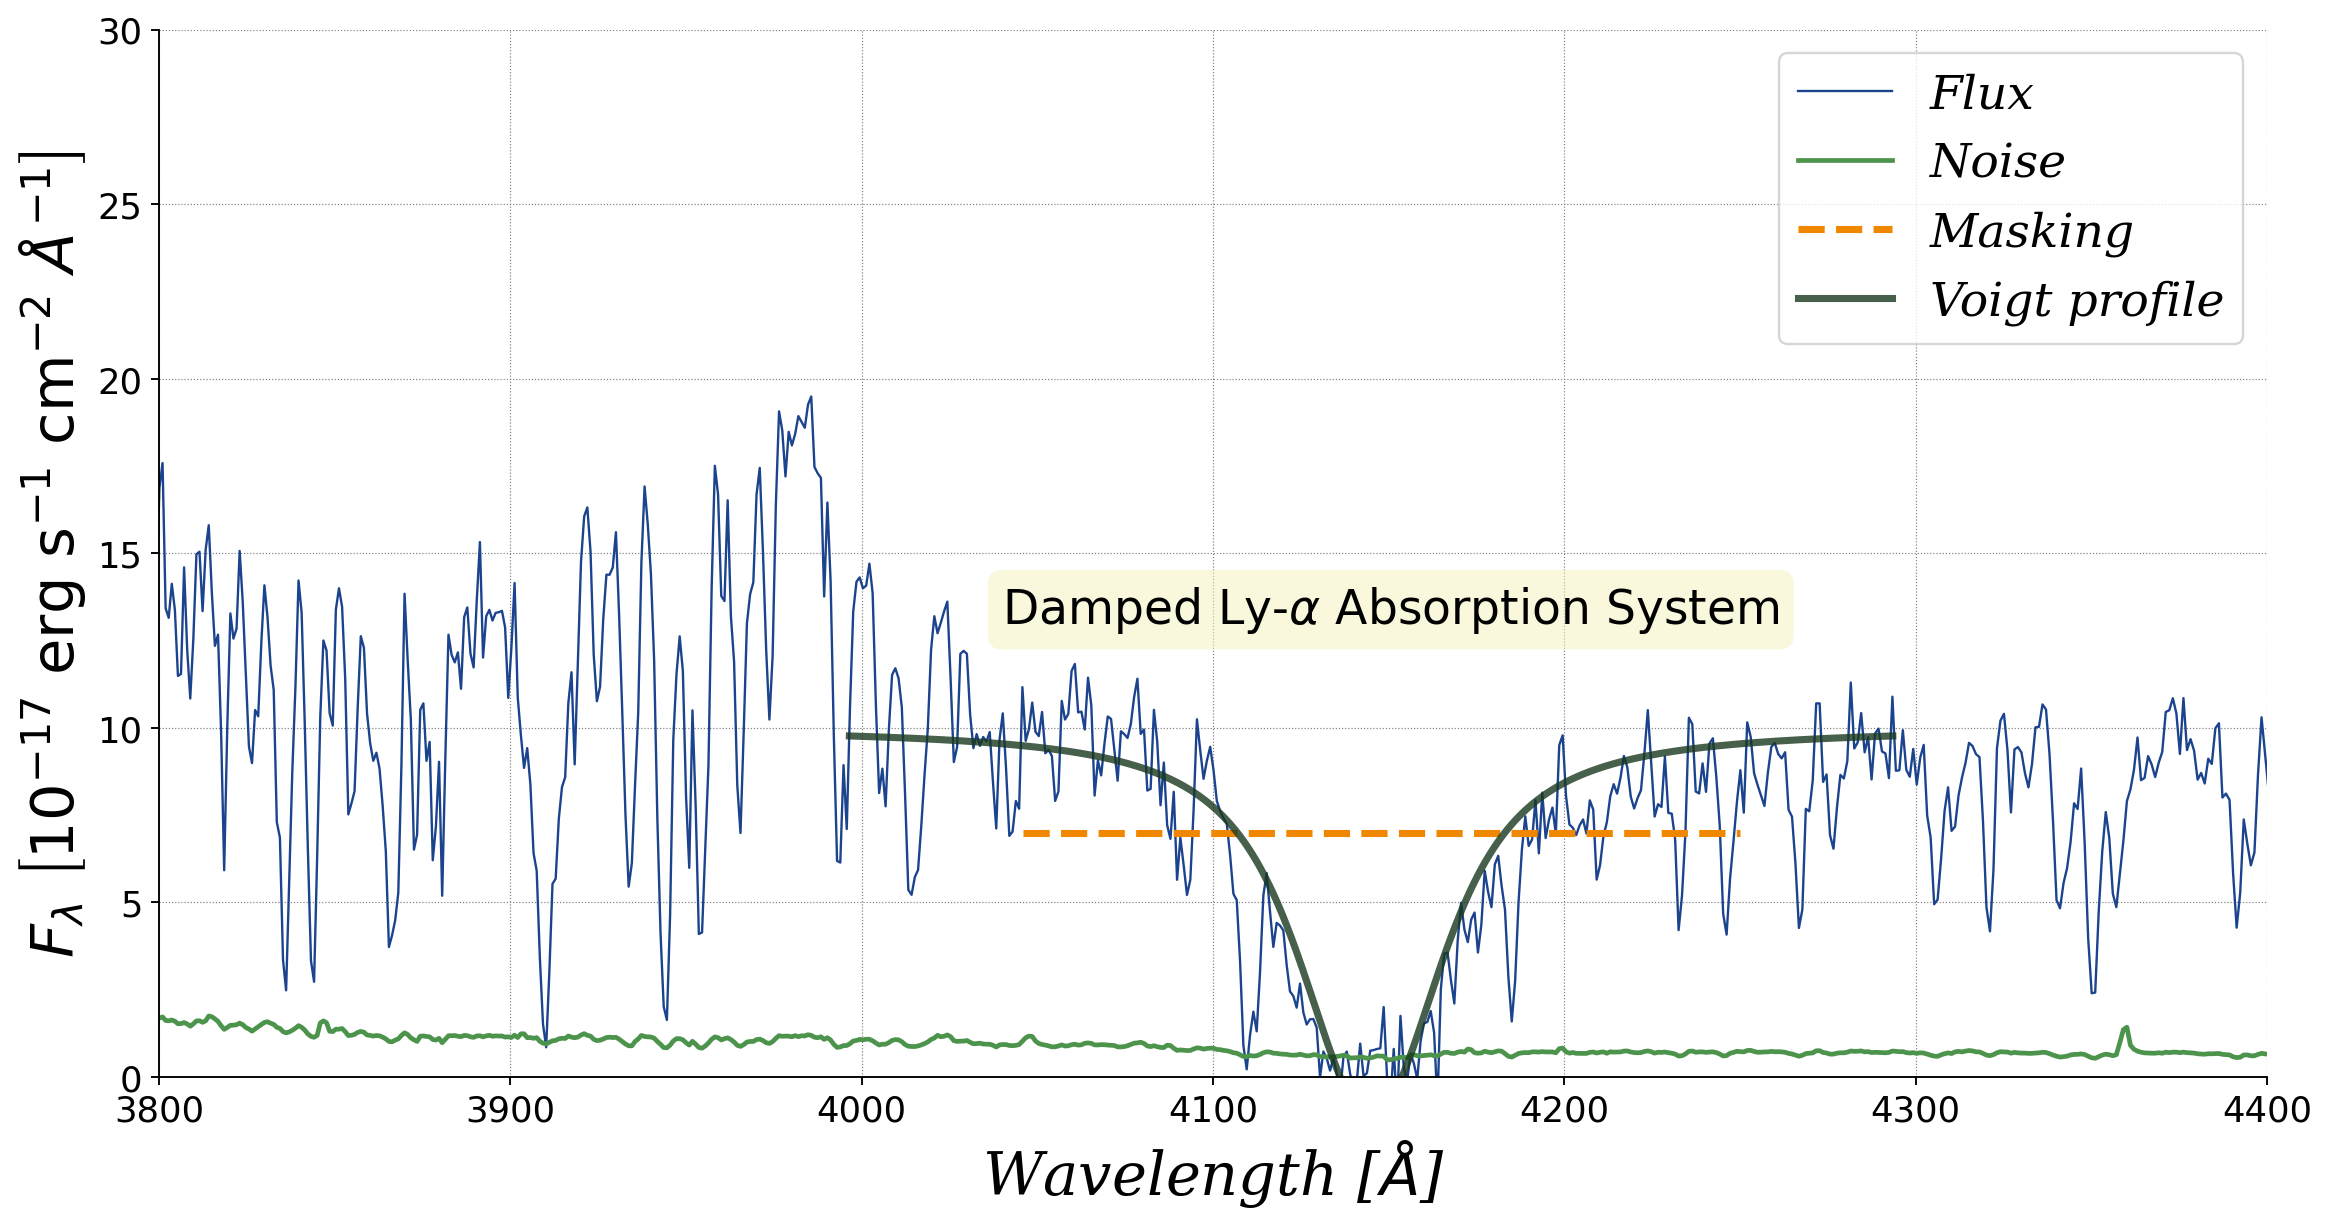

In [39]:
import pylab

plt.rcParams['axes.spines.left'] = True
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.bottom'] = True

plt.figure(figsize=(16,8),dpi=170)
plt.plot(10**spectra['loglam'],spectra['flux'],label = 'Flux',lw=1.0, color ='#1C448E')
plt.plot(10**spectra['loglam'],1/np.sqrt(spectra['ivar']),lw=2, color = '#4C934C',label = 'Noise')
plt.ylabel(r"$F_{\lambda}\ \left[ 10^{-17}\ {\rm erg\ s}^{-1}\ {\rm cm}^{-2}\ \AA^{-1} \right]$", style = 'oblique', family = 'serif', size = 25)
plt.xlabel('Wavelength [$\AA$]', style = 'oblique', family = 'serif', size = 25)
plt.yticks(fontsize = 15)
plt.xticks(fontsize = 15)

plt.xlim(3800,4400)
#plt.xlim(4148,4150)
#plt.ylim(0,2)
plt.ylim(0,30)
plt.grid(True, which="both", ls=":", color = 'gray', linewidth = 0.5)

plt.axhline(y = 7, xmin = 0.41, xmax = 0.75,color = '#F08700', label='Masking',linewidth = 3, ls ='--')

plt.text(4040, 13, r'Damped Ly-$\alpha$ Absorption System', fontsize = 20, 
         bbox = {'facecolor': text_fc, 'alpha': 0.5, 'boxstyle': "round,pad=0.3", 'ec': 'none'}, rotation = text_rot)



alpha, gamma = 0.1, 0.1
x = np.linspace(-148.5,148.5,1000)
pylab.plot(x+4145, 10+(-80*V(x*0.1, 1, 2)), label='Voigt profile',linewidth = 3, alpha = 0.8, color = '#19381F')
#pylab.xlim(-0.8,0.8)

plt.legend(prop = txt_prop, loc= 'upper right')
plt.savefig('eBOSS DLA mask.png', bbox_inches='tight')
plt.show()

/tmp/ipykernel_26117/3535533004.py:33: RuntimeWarning: divide by zero encountered in divide
  plt.plot(10**spectra['loglam'],1/np.sqrt(spectra['ivar']),lw=2, color = '#4C934C',label = 'Noise')


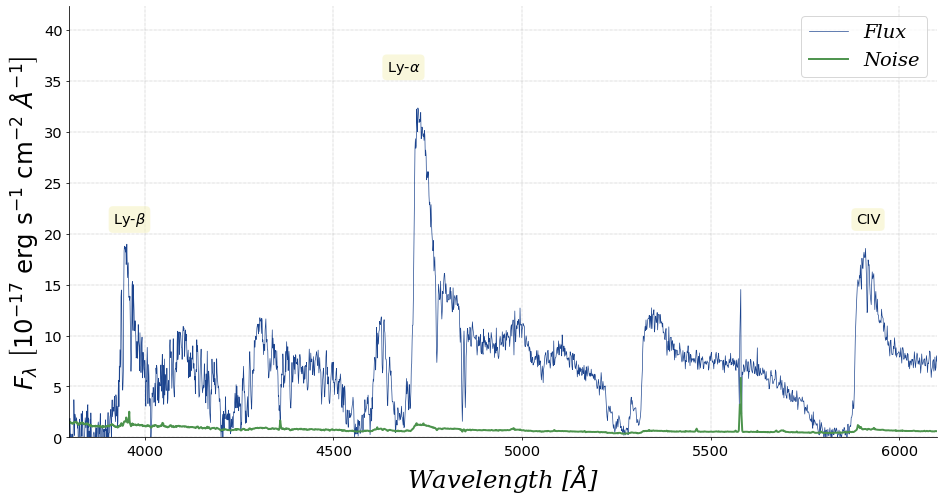

In [13]:
file_spc="spec-6392-56331-0942.fits"

keys = [int(file_spc[5:9]),int(file_spc[10:15]),int(file_spc[16:20])]

def sdss_z():
    nuevo = fits.open("/home/hquintero/eboss/DR14Q_v4_4.fits")
    comp = Table.read(nuevo)
    a = (comp['PLATE']==keys[0]) & (comp['MJD']==keys[1]) & (comp['FIBERID']==keys[2])
    spec = comp[a]
    z = spec['Z']
    return z

zzz = sdss_z()

local_dirspc="/home/hquintero/eboss/"
spc = os.path.join(local_dirspc,file_spc)


spectra = Table.read(spc)
info_add = fits.open(spc)[2]
add = Table.read(info_add)
tipe = str(add['OBJTYPE'][0])

plt.rcParams['axes.spines.left'] = True
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.bottom'] = True


plt.figure(figsize=(16,8),dpi=70)
plt.plot(10**spectra['loglam'],spectra['flux'],label = 'Flux'\
         ,lw=0.7, color ='#1C448E')
plt.plot(10**spectra['loglam'],1/np.sqrt(spectra['ivar']),lw=2, color = '#4C934C',label = 'Noise')
plt.ylabel(r"$F_{\lambda}\ \left[ 10^{-17}\ {\rm erg\ s}^{-1}\ {\rm cm}^{-2}\ \AA^{-1} \right]$", style = 'oblique', family = 'serif', size = 25)
plt.xlabel('Wavelength [$\AA$]', style = 'oblique', family = 'serif', size = 25)
plt.yticks(fontsize = 15)
plt.xticks(fontsize = 15)
plt.xlim(3800,6100)
plt.ylim(0,max(spectra['flux'])+10)
plt.grid(True, which="both", ls=":", color = 'gray', linewidth = 0.5)

plt.text((1+ zzz) * lines["Lya"], 36, r'Ly-$\alpha$', fontsize = 15, 
         bbox = {'facecolor': text_fc, 'alpha': 0.5, 'boxstyle': "round,pad=0.3", 'ec': 'none'}, rotation = text_rot)
plt.text((1+ zzz) * lines["Lyb"], 21, r'Ly-$\beta$', fontsize = 15, 
         bbox = {'facecolor': text_fc, 'alpha': 0.5, 'boxstyle': "round,pad=0.3", 'ec': 'none'}, rotation = text_rot)
plt.text((1+ zzz) * lines["CIV"]-text_xdel, 21, 'CIV', fontsize = 15, 
         bbox = {'facecolor': text_fc, 'alpha': 0.5, 'boxstyle': "round,pad=0.3", 'ec': 'none'}, rotation = text_rot)

#plt.axvline((1+ zzz) * lines["Lya"],ymin =0.83,ymax= 0.88, c=lc_fl, alpha=a_fl, linewidth = lw_fl)
#plt.axvline((1+ zzz) * lines["Lyb"],ymin =0.40,ymax= 0.45, c=lc_fl, alpha=a_fl, linewidth = lw_fl)
#plt.axvline((1+ zzz) * lines["CIV"],ymin =lb_lines[0],ymax= lb_lines[1], c=lc_fl, alpha=a_fl,ls ="-", linewidth = lw_fl)


plt.legend(prop = txt_prop, loc= 'upper right')
plt.show()